<a href="https://colab.research.google.com/github/GitMishka/misc/blob/main/word_cloud1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['word_cloud.csv'])) # replace 'FileName.csv' with your actual file name


Saving word_cloud.csv to word_cloud (2).csv


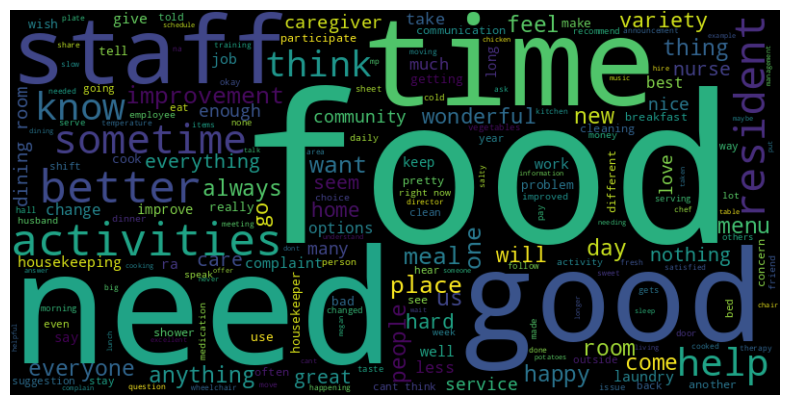

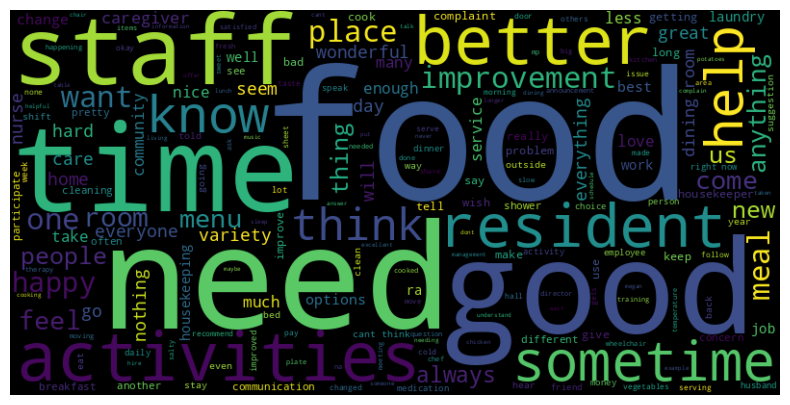

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you've loaded your data into a pandas dataframe named df
# df = pd.read_csv('path_to_your_data')

# Preprocessing text data
# Converting the text data to lower case and removing any special characters
df['Q24 - How can we improve in general?'] = df['Q24 - How can we improve in general?'].str.lower().replace('[^\w\s]','')

# Concatenate all the strings into one large text
text = ' '.join(response for response in df['Q24 - How can we improve in general?'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save word cloud
plt.savefig('wordcloud.png')

plt.show()


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define your search terms
search_terms = ["food", "staff", "communication", "service", "activities", "feel", "variety", "menu", "meal"]

# Ensure the data is string type
df['Q24 - How can we improve in general?'] = df['Q24 - How can we improve in general?'].astype(str)

# Initialize a dataframe to hold your results
results = pd.DataFrame(columns=['Term', 'Sentiment Score', 'Frequency'])

# For each term, calculate sentiment score and frequency
for term in search_terms:
    # Use regex to find the term in the text responses (case insensitive)
    df[term] = df['Q24 - How can we improve in general?'].apply(lambda x: re.findall(f'\\b{term}\\b', x, flags=re.IGNORECASE))

    # Calculate frequency by counting the number of times the term appears
    frequency = df[term].apply(len).sum()

    # Calculate sentiment score by applying the sentiment analyzer to each response, then taking the average
    sentiment_scores = df[df[term].apply(len) > 0]['Q24 - How can we improve in general?'].apply(lambda x: sia.polarity_scores(x)['compound']).mean()

    # Convert sentiment_scores from scale -1 to +1 to scale 0 to 100%
    sentiment_scores = (sentiment_scores + 1) * 50   # This line converts the scale

    # Append results to the dataframe
    results = results.append({'Term': term, 'Sentiment Score': sentiment_scores, 'Frequency': frequency}, ignore_index=True)

# Save results to a csv file
results.to_csv('sentiment_analysis_results.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-18-a9d756491a0e>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Term': term, 'Sentiment Score': sentiment_scores, 'Frequency': frequency}, ignore_index=True)
<ipython-input-18-a9d756491a0e>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Term': term, 'Sentiment Score': sentiment_scores, 'Frequency': frequency}, ignore_index=True)
<ipython-input-18-a9d756491a0e>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Term': term, 'Sentiment Score': sentiment_scores, 'Frequency': frequency}, ignore_index=Tru